In [1]:
import gym
import numpy as np
from stable_baselines.sac.policies import MlpPolicy as MlpPolicy_SAC
from stable_baselines import SAC
from citylearn import  CityLearn
import matplotlib.pyplot as plt
from pathlib import Path
import time

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
# Central agent controlling one of the buildings using the OpenAI Stable Baselines
climate_zone = 1
data_path = Path("data/Climate_Zone_"+str(climate_zone))
building_attributes = data_path / 'building_attributes.json'
weather_file = data_path / 'weather_data.csv'
solar_profile = data_path / 'solar_generation_1kW.csv'
building_state_actions = 'buildings_state_action_space.json'
building_ids = ['Building_3']
objective_function = ['ramping','1-load_factor','average_daily_peak','peak_demand','net_electricity_consumption','quadratic']
env = CityLearn(data_path, building_attributes, weather_file, solar_profile, building_ids, buildings_states_actions = building_state_actions, cost_function = objective_function, central_agent = True, verbose = 1)


In [3]:
model = SAC(MlpPolicy_SAC, env, verbose=0, learning_rate=0.01, gamma=0.99, tau=3e-4, batch_size=2048, learning_starts=8759)
start = time.time()
model.learn(total_timesteps=8760*7, log_interval=1000)
print(time.time()-start)

obs = env.reset()
dones = False
counter = []
while dones==False:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    counter.append(rewards)
env.cost()





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Cumulated reward: 523262061.7016195
Cumulated reward: 373498289.88566583
Cumulated reward: 374101933.5055459
Cumulated reward: 374101933.5055459
Cumulated reward: 374101933.5055459
Cumulated reward: 374101933.5055459
Cumulated reward: 374101933.5055459
1721.292117357254
Cumulated reward: 374101933.5055459


{'ramping': 1.0719012,
 '1-load_factor': 1.2039918410770736,
 'average_daily_peak': 1.4510968,
 'peak_demand': 1.2767103,
 'net_electricity_consumption': 1.1020107,
 'quadratic': 1.6764889,
 'total': 1.2970332819222186}

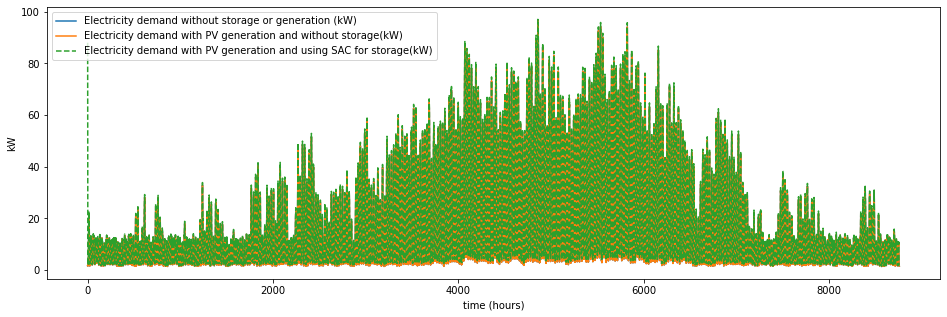

In [4]:
# Plotting winter operation
interval = range(0,8759)
plt.figure(figsize=(16,5))
plt.plot(env.net_electric_consumption_no_pv_no_storage[interval])
plt.plot(env.net_electric_consumption_no_storage[interval])
plt.plot(env.net_electric_consumption[interval], '--')
plt.xlabel('time (hours)')
plt.ylabel('kW')
plt.legend(['Electricity demand without storage or generation (kW)', 'Electricity demand with PV generation and without storage(kW)', 'Electricity demand with PV generation and using SAC for storage(kW)'])

In [5]:
# Central agent controlling all the buildings using the OpenAI Stable Baselines
climate_zone = 1
data_path = Path("data/Climate_Zone_"+str(climate_zone))
building_attributes = data_path / 'building_attributes.json'
weather_file = data_path / 'weather_data.csv'
solar_profile = data_path / 'solar_generation_1kW.csv'
building_state_actions = 'buildings_state_action_space.json'
building_ids = ['Building_1',"Building_2","Building_3","Building_4","Building_5","Building_6","Building_7","Building_8","Building_9"]
objective_function = ['ramping','1-load_factor','average_daily_peak','peak_demand','net_electricity_consumption']
env = CityLearn(data_path, building_attributes, weather_file, solar_profile, building_ids, buildings_states_actions = building_state_actions, cost_function = objective_function, central_agent = True, verbose = 1)


In [6]:
# model = SAC(MlpPolicy_SAC, env, verbose=0, gamma=0.985, learning_rate=0.01, learning_starts=8759)
model = SAC(MlpPolicy_SAC, env, verbose=0, learning_rate=0.01, gamma=0.985, batch_size=2048, learning_starts=8759)

start = time.time()
model.learn(total_timesteps=8760*5, log_interval=1000)
print(time.time()-start)

obs = env.reset()
dones = False
counter = []
while dones==False:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    counter.append(rewards)
env.cost()

Cumulated reward: 112693632162.57545
Cumulated reward: 119303458956.33707
Cumulated reward: 119985974498.46863
Cumulated reward: 119985974498.46863
Cumulated reward: 119985974498.46863
1187.7657282352448
Cumulated reward: 119985974498.46863


{'ramping': 0.82540506,
 '1-load_factor': 1.0381893281786885,
 'average_daily_peak': 1.0282862,
 'peak_demand': 1.5966171,
 'net_electricity_consumption': 1.0713938,
 'total': 1.1119783116310686}

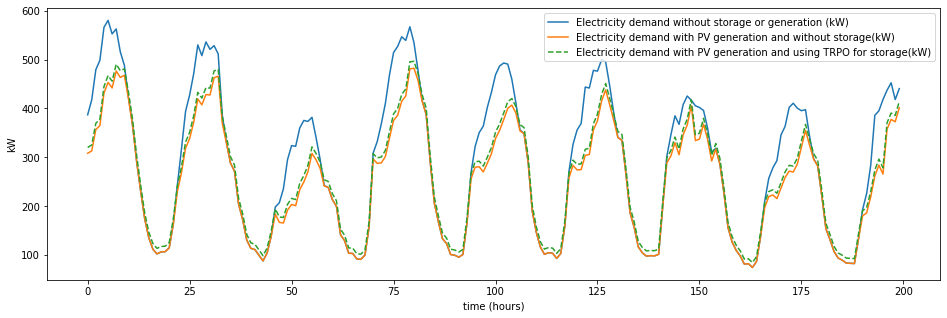

In [10]:
# Plotting winter operation
interval = range(5000,5200)
plt.figure(figsize=(16,5))
plt.plot(env.net_electric_consumption_no_pv_no_storage[interval])
plt.plot(env.net_electric_consumption_no_storage[interval])
plt.plot(env.net_electric_consumption[interval], '--')
plt.xlabel('time (hours)')
plt.ylabel('kW')
plt.legend(['Electricity demand without storage or generation (kW)', 'Electricity demand with PV generation and without storage(kW)', 'Electricity demand with PV generation and using TRPO for storage(kW)'])

In [8]:
# model = SAC(MlpPolicy_SAC, env, verbose=0, gamma=0.985, learning_rate=0.01, learning_starts=8759)
model = SAC(MlpPolicy_SAC, env, verbose=0, learning_rate=0.01, gamma=0.99, tau=3e-4, batch_size=2048, learning_starts=8759)

start = time.time()
model.learn(total_timesteps=8760*4, log_interval=1000)
print(time.time()-start)

obs = env.reset()
dones = False
counter = []
while dones==False:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    counter.append(rewards)
env.cost()

Cumulated reward: 112343015562.39345
Cumulated reward: 119514301949.13803
Cumulated reward: 119985974498.46863
Cumulated reward: 119985974498.46863
899.643002986908
Cumulated reward: 119985974498.46863


{'ramping': 0.82540506,
 '1-load_factor': 1.0381893281786885,
 'average_daily_peak': 1.0282862,
 'peak_demand': 1.5966171,
 'net_electricity_consumption': 1.0713938,
 'total': 1.1119783116310686}

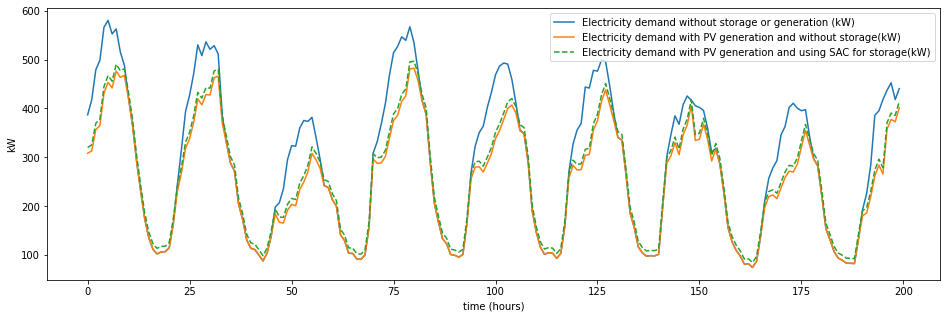

In [9]:
# Plotting winter operation
interval = range(5000,5200)
plt.figure(figsize=(16,5))
plt.plot(env.net_electric_consumption_no_pv_no_storage[interval])
plt.plot(env.net_electric_consumption_no_storage[interval])
plt.plot(env.net_electric_consumption[interval], '--')
plt.xlabel('time (hours)')
plt.ylabel('kW')
plt.legend(['Electricity demand without storage or generation (kW)', 'Electricity demand with PV generation and without storage(kW)', 'Electricity demand with PV generation and using SAC for storage(kW)'])